# LLOQ-pairwise-plots
1.27.23

Taking a crack at making pairwise comparison plots for impute method vs nothing and 
one impute method vs another. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

# plotting templates
sns.set(context="talk", style="ticks") 
sns.set_palette("tab10")

#### Get LLOQs for the original (unimputed) matrix

In [2]:
fom_orig = pd.read_csv("out/fom-orig-MCAR.csv")
orig_loq = fom_orig["LOQ"]
orig_loq[orig_loq == np.inf] = np.nan
#orig_loq

/net/gs/vol3/software/modules-sw-python/3.7.7/jupyter/5.7.9/Linux/CentOS7/x86_64/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


#### Get LLOQs for all five imputed matrices

In [3]:
fom_nmf = pd.read_csv("out/fom-NMF-recon-MCAR.csv")
nmf_loq = fom_nmf["LOQ"]
nmf_loq[nmf_loq == np.inf] = np.nan

fom_knn = pd.read_csv("out/fom-KNN-recon-MCAR.csv")
knn_loq = fom_knn["LOQ"]
knn_loq[knn_loq == np.inf] = np.nan

fom_mf = pd.read_csv("out/fom-mf-recon-MCAR.csv")
mf_loq = fom_mf["LOQ"]
mf_loq[mf_loq == np.inf] = np.nan

fom_min = pd.read_csv("out/fom-min-recon-MCAR.csv")
min_loq = fom_min["LOQ"]
min_loq[min_loq == np.inf] = np.nan

fom_std = pd.read_csv("out/fom-std-recon-MCAR.csv")
std_loq = fom_std["LOQ"]
std_loq[std_loq == np.inf] = np.nan

/net/gs/vol3/software/modules-sw-python/3.7.7/jupyter/5.7.9/Linux/CentOS7/x86_64/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/net/gs/vol3/software/modules-sw-python/3.7.7/jupyter/5.7.9/Linux/CentOS7/x86_64/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/net/gs/vol3/software/modules-sw-python/3.7.7/jupyter/5.7.9/Linux/CentOS7/x86_64/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documenta

***

***

## Statistical testing
Start with the Binomial test. 

#### missForest vs no impute

In [4]:
# get the LLOQs for missForest and no impute
orig_lloqs = np.array(fom_orig["LOQ"])
mf_lloqs = np.array(fom_mf["LOQ"])

# negative here means MF decreases LLOQ
    # positive here means MF increases LLOQ
mf_diffs = mf_lloqs - orig_lloqs

# remove NaNs
mf_diffs = mf_diffs[~np.isnan(mf_diffs)]

# count up positive and negatives
n_mf_inc = np.count_nonzero(mf_diffs > 0)
n_mf_dec = np.count_nonzero(mf_diffs < 0)
n_trials = n_mf_inc + n_mf_dec # should this be n_trials? or should it
                    # be the total number of peptides in the experiment?

# Binomial test
# x=num successes, n=num trials, p=hypothesized prob of success
binom_p_mf = stats.binom_test(x=n_mf_dec, n=n_trials, p=0.5, alternative="greater")

print("n peptides increased LLOQ: ", n_mf_inc)
print("n peptides decreased LLOQ: ", n_mf_dec)
print("one-sided binomial p-value: ", binom_p_mf)

n peptides increased LLOQ:  3115
n peptides decreased LLOQ:  4260
one-sided binomial p-value:  6.080009585908545e-41


#### NMF vs no impute

In [5]:
# get the LLOQs for NMF and no impute
orig_lloqs = np.array(fom_orig["LOQ"])
nmf_lloqs = np.array(fom_nmf["LOQ"])

# negative here means NMF decreases LLOQ
    # positive here means NMF increases LLOQ
nmf_diffs = nmf_lloqs - orig_lloqs

# remove NaNs
nmf_diffs = nmf_diffs[~np.isnan(nmf_diffs)]

# count up positive and negatives
n_nmf_inc = np.count_nonzero(nmf_diffs > 0)
n_nmf_dec = np.count_nonzero(nmf_diffs < 0)
n_trials = n_nmf_inc + n_nmf_dec

# Binomial test
# x=num successes, n=num trials, p=hypothesized prob of success
binom_p_nmf = stats.binom_test(x=n_nmf_dec, n=n_trials, p=0.5, alternative="greater")

print("n peptides increased LLOQ: ", n_nmf_inc)
print("n peptides decreased LLOQ: ", n_nmf_dec)
print("one-sided binomial p-value: ", binom_p_nmf)

n peptides increased LLOQ:  2498
n peptides decreased LLOQ:  1084
one-sided binomial p-value:  1.0


#### kNN vs no impute

In [6]:
# get the LLOQs for kNN and no impute
orig_lloqs = np.array(fom_orig["LOQ"])
knn_lloqs = np.array(fom_knn["LOQ"])

# negative here means kNN decreases LLOQ
    # positive here means kNN increases LLOQ
knn_diffs = knn_lloqs - orig_lloqs

# remove NaNs
knn_diffs = knn_diffs[~np.isnan(knn_diffs)]

# count up positive and negatives
n_knn_inc = np.count_nonzero(knn_diffs > 0)
n_knn_dec = np.count_nonzero(knn_diffs < 0)
n_trials = n_knn_inc + n_knn_dec

# Binomial test
# x=num successes, n=num trials, p=hypothesized prob of success
binom_p_knn = stats.binom_test(x=n_knn_dec, n=n_trials, p=0.5, alternative="greater")

print("n peptides increased LLOQ: ", n_knn_inc)
print("n peptides decreased LLOQ: ", n_knn_dec)
print("one-sided binomial p-value: ", binom_p_knn)

n peptides increased LLOQ:  2184
n peptides decreased LLOQ:  261
one-sided binomial p-value:  1.0


#### Sample min vs no impute

In [7]:
# get the LLOQs for sample min and no impute
orig_lloqs = np.array(fom_orig["LOQ"])
min_lloqs = np.array(fom_min["LOQ"])

# negative here means sample min impute decreases LLOQ
    # positive here means sample min impute increases LLOQ
min_diffs = min_lloqs - orig_lloqs

# remove NaNs
min_diffs = min_diffs[~np.isnan(min_diffs)]

# count up positive and negatives
n_min_inc = np.count_nonzero(min_diffs > 0)
n_min_dec = np.count_nonzero(min_diffs < 0)
n_trials = n_min_inc + n_min_dec

# Binomial test
# x=num successes, n=num trials, p=hypothesized prob of success
binom_p_min = stats.binom_test(x=n_min_dec, n=n_trials, p=0.5, alternative="greater")

print("n peptides increased LLOQ: ", n_min_inc)
print("n peptides decreased LLOQ: ", n_min_dec)
print("one-sided binomial p-value: ", binom_p_min)

n peptides increased LLOQ:  1187
n peptides decreased LLOQ:  252
one-sided binomial p-value:  1.0


#### Gaussian random sample impute vs no impute

In [8]:
# get the LLOQs for Gaussian sample and no impute
orig_lloqs = np.array(fom_orig["LOQ"])
std_lloqs = np.array(fom_std["LOQ"])

# negative here means Gaussian sample impute decreases LLOQ
    # positive here means sample min impute increases LLOQ
std_diffs = std_lloqs - orig_lloqs

# remove NaNs
std_diffs = std_diffs[~np.isnan(std_diffs)]

# count up positive and negatives
n_std_inc = np.count_nonzero(std_diffs > 0)
n_std_dec = np.count_nonzero(std_diffs < 0)
n_trials = n_std_inc + n_std_dec

# Binomial test
# x=num successes, n=num trials, p=hypothesized prob of success
binom_p_std = stats.binom_test(x=n_std_dec, n=n_trials, p=0.5, alternative="greater")

print("n peptides increased LLOQ: ", n_std_inc)
print("n peptides decreased LLOQ: ", n_std_dec)
print("one-sided binomial p-value: ", binom_p_std)

n peptides increased LLOQ:  1126
n peptides decreased LLOQ:  254
one-sided binomial p-value:  1.0


***

## Get scatterplots

#### Basic scatterplot -- missForest vs no impute

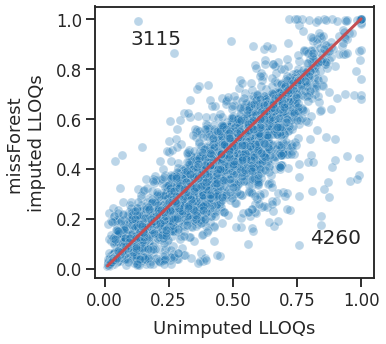

In [33]:
# get the LLOQs pre and post-imputation
orig_lloqs = np.array(fom_orig["LOQ"])
mf_lloqs = np.array(fom_mf["LOQ"])

# init plot
plt.figure(figsize=(5,5))
sns.scatterplot(x=orig_lloqs, y=mf_lloqs, alpha=0.3)

# get mins and maxes
set_min = np.nanmin([orig_lloqs, mf_lloqs])
set_max = np.nanmax([orig_lloqs, mf_lloqs])

# add diagonal line
x = np.linspace(set_min, set_max, 100)
y = x
plt.plot(x, y, '-r', label='y=x', alpha=1, linewidth=3)

# add the number of increased and decreased LLOQs
plt.text(0.1, 0.9, n_mf_inc, fontsize=20)
plt.text(0.8, 0.1, n_mf_dec, fontsize=20)

plt.xlabel("Unimputed LLOQs", labelpad=10)
plt.ylabel("missForest \nimputed LLOQs", labelpad=10)

plt.savefig("mf-vs-no-impute-scatter.png", dpi=250, bbox_inches="tight")

#### missForest vs NMF

Text(0, 0.5, 'missForest \nimputed LLOQs')

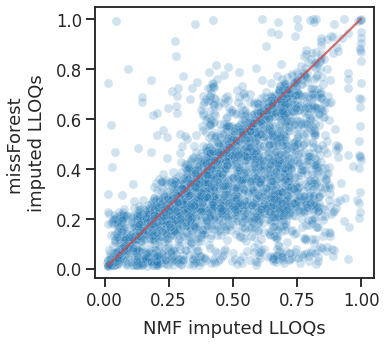

In [10]:
# get the LLOQs for NMF and missForest
nmf_lloqs = np.array(fom_nmf["LOQ"])
mf_lloqs = np.array(fom_mf["LOQ"])

# init plot
plt.figure(figsize=(5,5))
sns.scatterplot(x=nmf_lloqs, y=mf_lloqs, alpha=0.2)

# get mins and maxes
set_min = np.nanmin([nmf_lloqs, mf_lloqs])
set_max = np.nanmax([nmf_lloqs, mf_lloqs])

# add diagonal line
x = np.linspace(set_min, set_max, 100)
y = x
plt.plot(x, y, '-r', label='y=x', alpha=1, linewidth=3)

plt.xlabel("NMF imputed LLOQs", labelpad=10)
plt.ylabel("missForest \nimputed LLOQs", labelpad=10)

#### NMF vs no impute

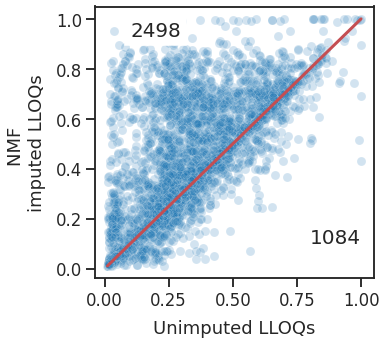

In [34]:
# get the LLOQs pre and post-imputation
orig_lloqs = np.array(fom_orig["LOQ"])
nmf_lloqs = np.array(fom_nmf["LOQ"])

# init plot
plt.figure(figsize=(5,5))
sns.scatterplot(x=orig_lloqs, y=nmf_lloqs, alpha=0.2)

# get mins and maxes
set_min = np.nanmin([orig_lloqs, nmf_lloqs])
set_max = np.nanmax([orig_lloqs, nmf_lloqs])

# add diagonal line
x = np.linspace(set_min, set_max, 100)
y = x
plt.plot(x, y, '-r', label='y=x', alpha=1, linewidth=3)

# add the number of increased and decreased LLOQs
#plt.text(0.08, 0.93, n_nmf_inc)
plt.text(0.1, 0.93, n_nmf_inc, bbox={"pad":5, "facecolor":"white", "alpha":1.0}, fontsize=20)
plt.text(0.8, 0.1, n_nmf_dec, fontsize=20)

plt.xlabel("Unimputed LLOQs", labelpad=10)
plt.ylabel("NMF \nimputed LLOQs", labelpad=10)

plt.savefig("nmf-vs-no-impute-scatter.png", dpi=250, bbox_inches="tight")

#### kNN vs no impute

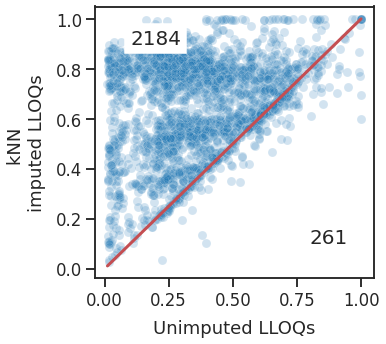

In [35]:
# get the LLOQs pre and post-imputation
orig_lloqs = np.array(fom_orig["LOQ"])
knn_lloqs = np.array(fom_knn["LOQ"])

# init plot
plt.figure(figsize=(5,5))
sns.scatterplot(x=orig_lloqs, y=knn_lloqs, alpha=0.2)

# get mins and maxes
set_min = np.nanmin([orig_lloqs, knn_lloqs])
set_max = np.nanmax([orig_lloqs, knn_lloqs])

# add diagonal line
x = np.linspace(set_min, set_max, 100)
y = x
plt.plot(x, y, '-r', label='y=x', alpha=1, linewidth=3)

# add the number of increased and decreased LLOQs
plt.text(0.1, 0.9, n_knn_inc, bbox={"pad": 5, "facecolor":"white"}, fontsize=20)
plt.text(0.8, 0.1, n_knn_dec, fontsize=20)

plt.xlabel("Unimputed LLOQs", labelpad=10)
plt.ylabel("kNN \nimputed LLOQs", labelpad=10)

plt.savefig("knn-vs-no-impute-scatter.png", dpi=250, bbox_inches="tight")

#### Gaussian sample vs no impute

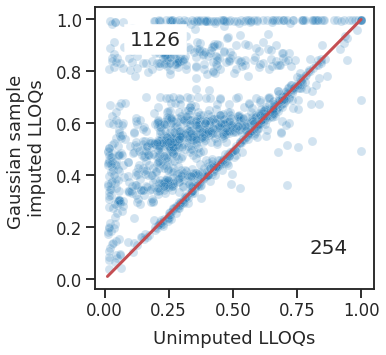

In [36]:
# get the LLOQs pre and post-imputation
orig_lloqs = np.array(fom_orig["LOQ"])
gsample_lloqs = np.array(fom_std["LOQ"])

# init plot
plt.figure(figsize=(5,5.2))
sns.scatterplot(x=orig_lloqs, y=gsample_lloqs, alpha=0.2)

# get mins and maxes
set_min = np.nanmin([orig_lloqs, gsample_lloqs])
set_max = np.nanmax([orig_lloqs, gsample_lloqs])

# add diagonal line
x = np.linspace(set_min, set_max, 100)
y = x
plt.plot(x, y, '-r', label='y=x', alpha=1, linewidth=3)

# add the number of increased and decreased LLOQs
plt.text(0.1, 0.9, n_std_inc, bbox={"pad": 5, "facecolor":"white"}, fontsize=20)
plt.text(0.8, 0.1, n_std_dec, fontsize=20)

plt.xlabel("Unimputed LLOQs", labelpad=10)
plt.ylabel("Gaussian sample \nimputed LLOQs", labelpad=10)

plt.savefig("gsample-vs-no-impute-scatter.png", dpi=250, bbox_inches="tight")